In [1]:
# # Main function to convert TEME coordinates to latitude and longitude
# def teme_to_latlon(x_teme, y_teme, z_teme, datetime_utc):
#     jd = julian_date(datetime_utc)
#     gst = gst_from_julian_date(jd)
#     x_ecef, y_ecef, z_ecef = teme_to_ecef(x_teme, y_teme, z_teme, gst)
#     lat, lon, alt = ecef_to_geodetic(x_ecef, y_ecef, z_ecef)
#     return lat, lon, alt

In [2]:
import json
import pandas as pd
from datetime import datetime

In [3]:
from orbit_predictor.utils import gstime_from_datetime
from orbit_predictor.coordinate_systems import eci_to_ecef, ecef_to_llh

In [4]:
# Read data from csv
position_df=pd.read_csv("data/position_telemetry")

In [5]:
t=position_df.epoch[0]

In [6]:
t=datetime.fromisoformat(t)

In [7]:
x_teme=position_df.position_teme_km_x[0]
y_teme=position_df.position_teme_km_y[0]
z_teme=position_df.position_teme_km_z[0]


In [8]:
gstime_from_datetime(t)

4.57817169508882

In [9]:
coordinates_in_ecef=eci_to_ecef((x_teme,y_teme,z_teme), gstime_from_datetime(t))
print(coordinates_in_ecef)

(-1141.3402316662812, -3951.0495386716284, 5542.3233445429705)


In [10]:
ecef_to_llh(coordinates_in_ecef)

(53.59299252013463, -106.11242671918764, 537.1831324904151)

In [11]:
n=position_df.shape[0]

In [12]:
latitude=[]
longitude=[]
timestamp=[]
for i in range(n):
    t=position_df.epoch[i]
    t=datetime.fromisoformat(t)
    x_teme=position_df.position_teme_km_x[i]
    y_teme=position_df.position_teme_km_y[i]
    z_teme=position_df.position_teme_km_z[i]
    coordinates_in_ecef=eci_to_ecef((x_teme,y_teme,z_teme), gstime_from_datetime(t))
    coordinates_in_lat_long=ecef_to_llh(coordinates_in_ecef)
    timestamp.append(t)
    latitude.append(coordinates_in_lat_long[0])
    longitude.append(coordinates_in_lat_long[1])

/home/esteban/projects/job_interview/.venv/lib/python3.11/site-packages/orbit_predictor/coordinate_systems.py:68: RuntimeWarning: invalid value encountered in scalar divide
  thet = atan(ecef_km[2] * a / (p * b))


In [13]:
dict = {"timestamp":timestamp, "latitude":latitude , "longitude": longitude}

In [14]:
df = pd.DataFrame(dict)

In [15]:
df.head()

,timestamp,latitude,longitude
0,2022-04-08 04:23:34+00:00,53.592993,-106.112427
1,2022-04-08 04:23:44+00:00,54.207126,-106.389614
2,2022-04-08 04:23:54+00:00,54.820699,-106.673873
3,2022-04-08 04:24:04+00:00,55.433688,-106.965577
4,2022-04-08 04:24:14+00:00,56.046065,-107.265130


In [16]:
df.tail()

,timestamp,latitude,longitude
259196,2022-05-08 04:22:54+00:00,-71.815127,60.717890
259197,2022-05-08 04:23:04+00:00,-72.382952,59.814925
259198,2022-05-08 04:23:14+00:00,-72.946749,58.856757
259199,2022-05-08 04:23:24+00:00,-73.506113,57.838177
259200,2022-05-08 04:23:34+00:00,-74.060586,56.753376


In [17]:
df.describe()

,latitude,longitude
count,251557.000000,259201.000000
mean,0.001904,1.344066
std,50.683572,103.731248
min,-82.539022,-179.999840
25%,-44.699820,-87.552399
50%,0.003212,0.000000
75%,44.715752,90.124227
max,82.539030,180.000000


In [19]:
import matplotlib.pyplot as plt


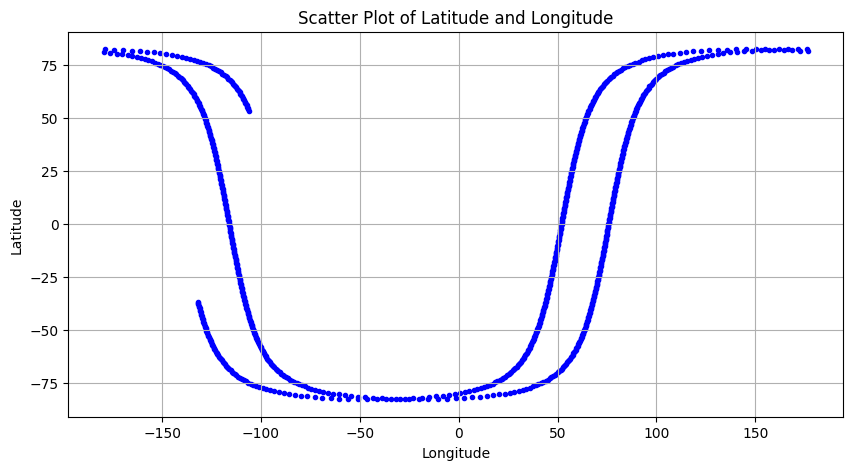

In [25]:
# Create the scatter plot
plt.figure(figsize=(10, 5))
plt.scatter(longitude[0:1000], latitude[0:1000], c='blue',marker='.')#marker='o'

# Add titles and labels
plt.title('Scatter Plot of Latitude and Longitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Optionally add grid
plt.grid(True)

# Show the plot
plt.show()